In [14]:
import sys
print(sys.version)
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

from astropy.timeseries import LombScargle

# configure notebook for plotting
%matplotlib inline

# mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
#mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import math

3.9.18 (main, Sep 11 2023, 08:38:23) 
[Clang 14.0.6 ]


In [ ]:
#first we define flash for each view
#Next define distant galaxies in each view
#apply clustering to each distant galaxy and print centres

In [58]:
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv')

ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Front/Star_Data.csv') 

ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Back/Star_Data.csv') 

ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Left/Star_Data.csv') 

In [24]:
ddir = '/Users/eleanor/Downloads/universe_2/'
flash = pd.read_csv(ddir+'Flash_Data.csv') 

flashF=flash[flash['Direction']=='Front']
CFf=np.array(list(zip(flashF.X,flashF.Y)))

flashBA=flash[flash['Direction']=='Back']
CBAf=np.array(list(zip(flashBA.X,flashBA.Y)))

flashT=flash[flash['Direction']=='Top']
CTf=np.array(list(zip(flashT.X,flashT.Y)))

flashB=flash[flash['Direction']=='Bottom']
CBf=np.array(list(zip(flashB.X,flashB.Y)))

flashR=flash[flash['Direction']=='Right']
CRf=np.array(list(zip(flashR.X,flashR.Y)))

flashL=flash[flash['Direction']=='Left']
CLf=np.array(list(zip(flashL.X,flashL.Y)))

DF = pd.read_csv(ddir+'Front/Distant_Galaxy_Data.csv') 
CDF=np.array(list(zip(DF.X,DF.Y)))

DBA = pd.read_csv(ddir+'Back/Distant_Galaxy_Data.csv') 
CDBA=np.array(list(zip(DBA.X,DBA.Y)))

DT = pd.read_csv(ddir+'Top/Distant_Galaxy_Data.csv') 
CDT=np.array(list(zip(DT.X,DT.Y)))

DB = pd.read_csv(ddir+'Bottom/Distant_Galaxy_Data.csv') 
CDB=np.array(list(zip(DB.X,DB.Y)))

DR = pd.read_csv(ddir+'Right/Distant_Galaxy_Data.csv') 
CDR=np.array(list(zip(DR.X,DR.Y)))

DL = pd.read_csv(ddir+'Left/Distant_Galaxy_Data.csv') 
CDL=np.array(list(zip(DL.X,DL.Y)))

Text(0.5, 1.0, 'Front flash and distant')

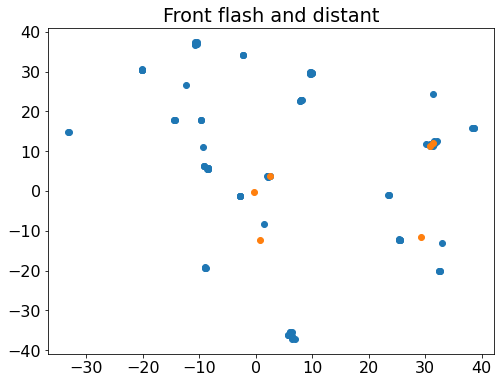

In [36]:
plt.scatter(CDF[:,0], CDF[:,1])
plt.scatter(CFf[:,0], CFf[:,1])
plt.title('Front flash and distant')
#CFf

#first is flash, second is distant galaxy
#30.9 ,  11.22 -> 31.048275    11.3704
#2.48,   3.71 -> 2.24322143   3.71893571

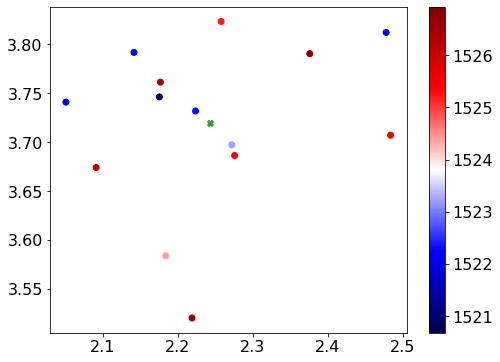

In [60]:
centre = (2.24322143, 3.71893571)
d = np.sqrt((DF.X-centre[0])** 2 + (DF.Y - centre[1])**2)
galaxyt1 = DF[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X')

Text(0.5, 1.0, 'Clustered Distant Front')

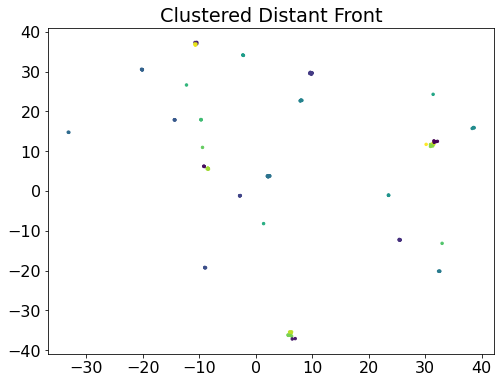

In [35]:
kmeans=KMeans(n_clusters=30)
kmeans.fit(CDF)
plt.scatter(CDF[:,0], CDF[:,1],s=6, c=kmeans.labels_)
plt.title('Clustered Distant Front')
#print(kmeans.cluster_centers_)

,Name,Direction,X,Y,Photon-Count
1,FE02,Back,35.87,-40.01,388
7,FE08,Back,-8.57,-2.64,543
10,FE11,Back,0.68,18.32,323
19,FE20,Back,-4.00,-6.08,327
33,FE34,Back,19.81,0.35,959
50,FE51,Back,0.64,-17.55,331
53,FE54,Back,-19.68,-18.05,479


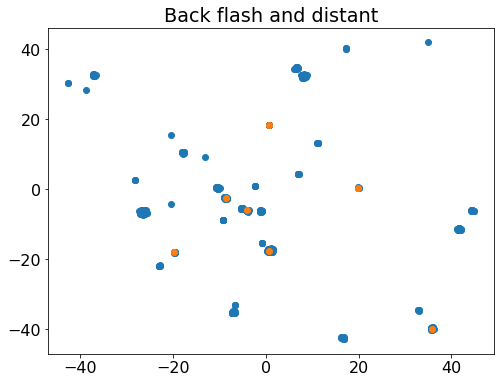

In [42]:
plt.scatter(CDBA[:,0], CDBA[:,1])
plt.scatter(CBAf[:,0], CBAf[:,1])
plt.title('Back flash and distant')
#CBAf

#first is flash, second is distant galaxy
#-19.68, -18.05 -> -19.65197143 -18.05908571
# -8.57,  -2.64 -> -8.67613158  -2.54287895
# -4.  ,  -6.08 -> -3.9688125   -6.23085625
# 0.64, -17.55 -> 0.59589412 -17.6515 
# 35.87, -40.01 -> 35.83995    -40.08078333
flashBA

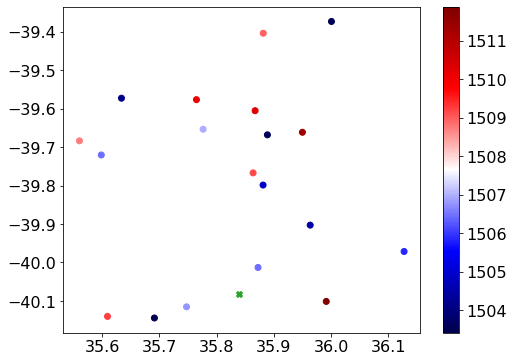

In [66]:
centre = (35.83995,    -40.08078333)
d = np.sqrt((DBA.X-centre[0])** 2 + (DBA.Y - centre[1])**2)
galaxyt1 = DBA[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X')

Text(0.5, 1.0, 'Clustered Distant Back')

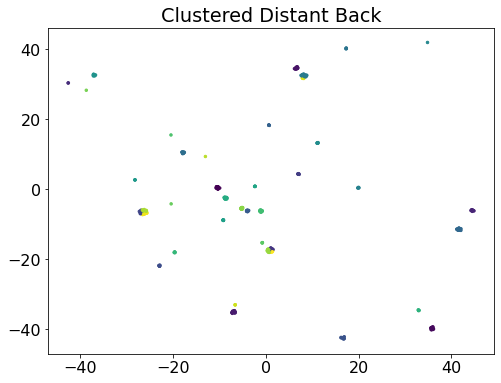

In [40]:

kmeans=KMeans(n_clusters=40)
kmeans.fit(CDBA)
plt.scatter(CDBA[:,0], CDBA[:,1],s=6, c=kmeans.labels_)
plt.title('Clustered Distant Back')
#print(kmeans.cluster_centers_)

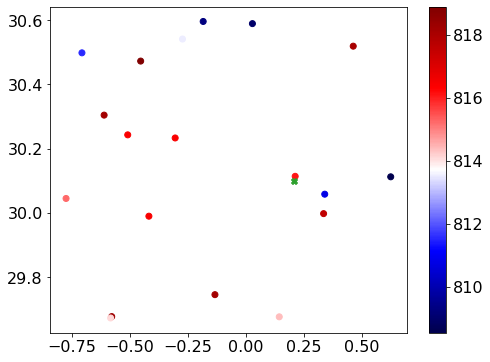

In [73]:
centre = (0.21,30.1)
d = np.sqrt((DT.X-centre[0])** 2 + (DT.Y - centre[1])**2)
galaxyt1 = DT[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X')

Text(0.5, 1.0, 'Top flash and distant')

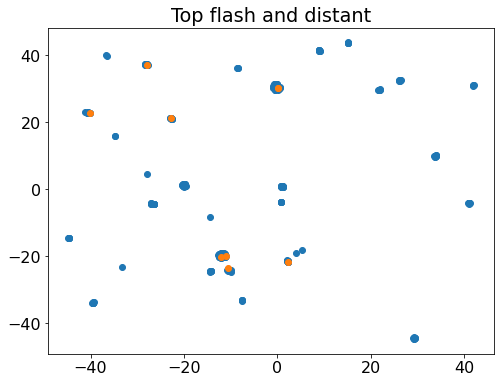

In [47]:
plt.scatter(CDT[:,0], CDT[:,1])
plt.scatter(CTf[:,0], CTf[:,1])
plt.title('Top flash and distant')
# -40.20	22.73 2320
# -27.84	36.99 372
#-22.67	21.08	460
# -11.09	-19.88	354
#2.22	-21.68	506
# 0.21	30.1 1295
#flashT


Text(0.5, 1.0, 'Clustered Distant Top')

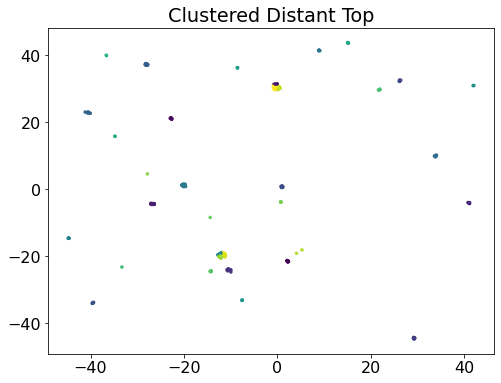

In [48]:
kmeans=KMeans(n_clusters=35)
kmeans.fit(CDT)
plt.scatter(CDT[:,0], CDT[:,1],s=6, c=kmeans.labels_)
plt.title('Clustered Distant Top')
#print(kmeans.cluster_centers_)

,Name,Direction,X,Y,Photon-Count
13,FE14,Bottom,-29.79,8.73,80368
20,FE21,Bottom,13.02,-14.75,1906
31,FE32,Bottom,-31.31,11.77,69549
32,FE33,Bottom,6.44,29.02,369
39,FE40,Bottom,-25.83,43.41,2212
41,FE42,Bottom,13.60,-15.31,1923
52,FE53,Bottom,6.36,20.85,471


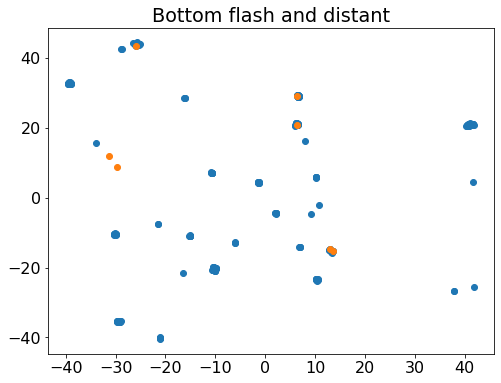

In [75]:
plt.scatter(CDB[:,0], CDB[:,1])
plt.scatter(CBf[:,0], CBf[:,1])
plt.title('Bottom flash and distant')
# -25.83	43.41	2212
# 13.60	-15.31	1923
# 6.44	29.02	369
# 6.36	20.85	471
flashB

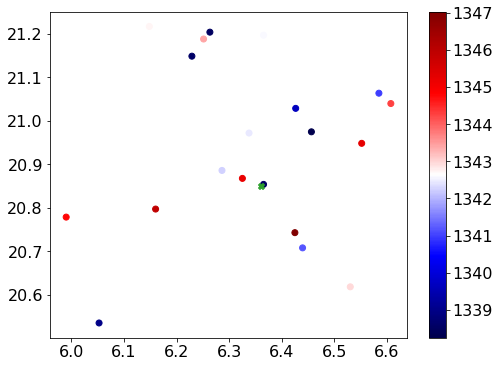

In [80]:
centre = (6.36,20.85)
d = np.sqrt((DB.X-centre[0])** 2 + (DB.Y - centre[1])**2)
galaxyt1 = DB[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X')

Text(0.5, 1.0, 'Clustered Distant Bottom')

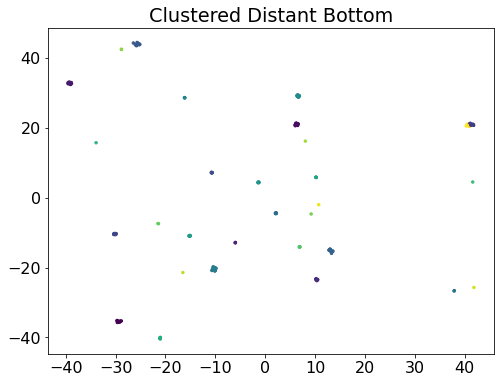

In [51]:
kmeans=KMeans(n_clusters=30)
kmeans.fit(CDB)
plt.scatter(CDB[:,0], CDB[:,1],s=6, c=kmeans.labels_)
plt.title('Clustered Distant Bottom')
#print(kmeans.cluster_centers_)

Text(0.5, 1.0, 'Right flash and distant')

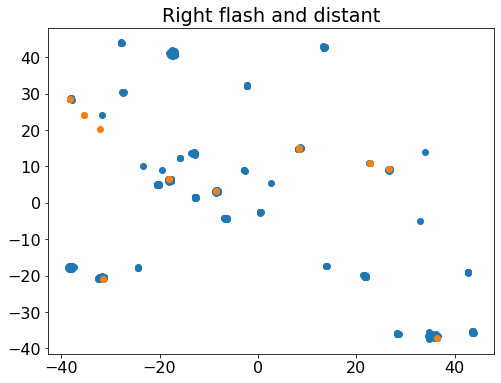

In [81]:
plt.scatter(CDR[:,0], CDR[:,1])
plt.scatter(CRf[:,0], CRf[:,1])
plt.title('Right flash and distant')
# -38.22	28.53	441
#	-31.55	-20.94	983
#-8.53	3.14	899
# -17.97	6.44	544
# 8.42	15.10	1307
# 22.70	10.93	2522
# 26.69	9.40	695
#flashR

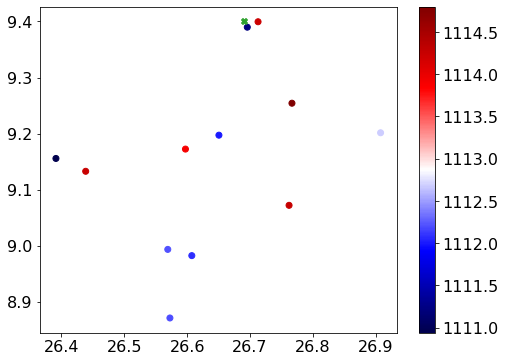

In [88]:
centre = (26.69,9.40)
d = np.sqrt((DR.X-centre[0])** 2 + (DR.Y - centre[1])**2)
galaxyt1 = DR[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X')

Text(0.5, 1.0, 'Clustered Distant Right')

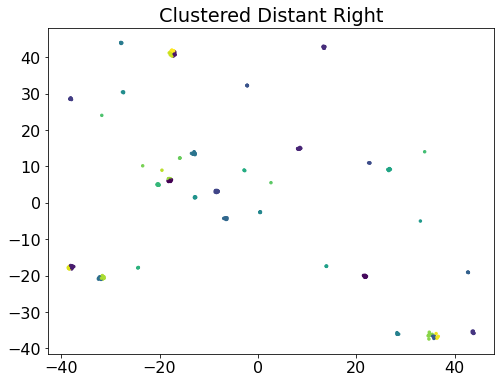

In [27]:
kmeans=KMeans(n_clusters=40)
kmeans.fit(CDR)
plt.scatter(CDR[:,0], CDR[:,1],s=6, c=kmeans.labels_)
plt.title('Clustered Distant Right')
#print(kmeans.cluster_centers_)

Text(0.5, 1.0, 'Left flash and distant')

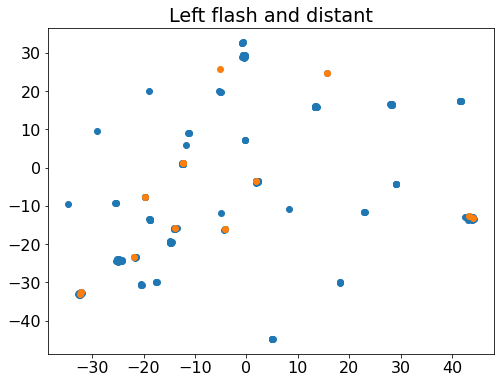

In [89]:
plt.scatter(CDL[:,0], CDL[:,1])
plt.scatter(CLf[:,0], CLf[:,1])
plt.title('Left flash and distant')
# -32.09	-32.57	400
# -21.79	-23.39	1898
#-13.81	-15.89	1520
# -12.31	1.17	516
#-4.11	-16.14	1163
#flashL

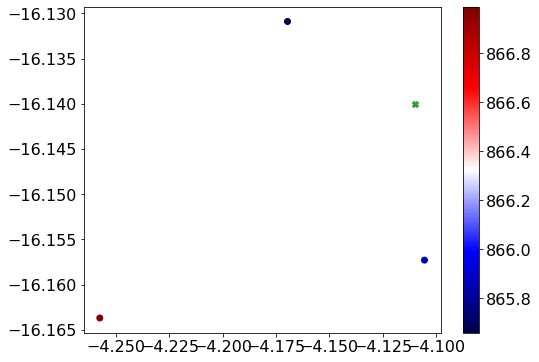

In [95]:
centre = (-4.11,-16.14)
d = np.sqrt((DL.X-centre[0])** 2 + (DL.Y - centre[1])**2)
galaxyt1 = DL[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X')

Text(0.5, 1.0, 'Clustered Distant Left')

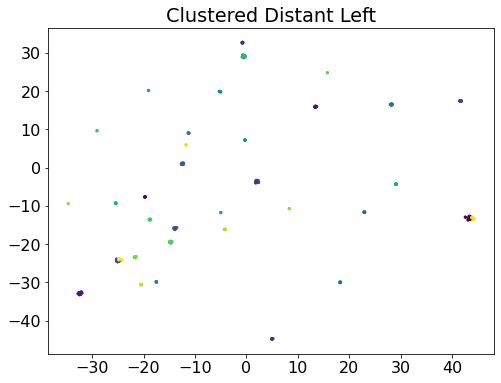

In [29]:
kmeans=KMeans(n_clusters=35)
kmeans.fit(CDL)
plt.scatter(CDL[:,0], CDL[:,1],s=6, c=kmeans.labels_)
plt.title('Clustered Distant Left')
#print(kmeans.cluster_centers_)